In [1]:
import h5py
import json
import pandas as pd
import numpy as np
import numba
import sys
import os
from tiled.client import from_uri
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import Timewalk_corr as twalk

sys.path.append('/nsls2/data/chx/proposals/2025-1/pass-316251/packages')

import tpxspdc as ts

In [2]:
## Example using 100 files (i.e. 100 seconds worth of data) of 1 position at 10keV

j = 0
num_files = 600

input_files = [
    f"/nsls2/data/chx/proposals/2025-1/pass-316251/Luna_software_testing/calib_data/15keV/rawBBKLP_{i:06d}.tpx3"
    for i in range(num_files*j,num_files*(j+1))
]

Fitting for best timewalk params...


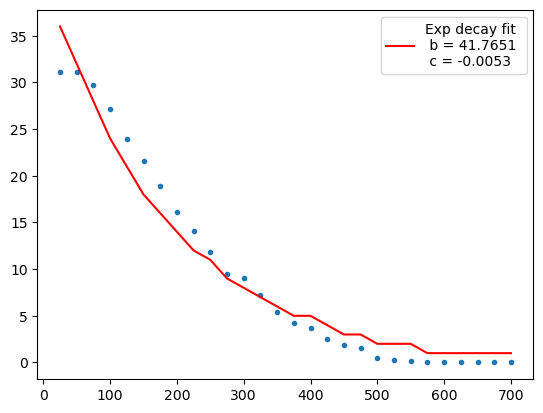

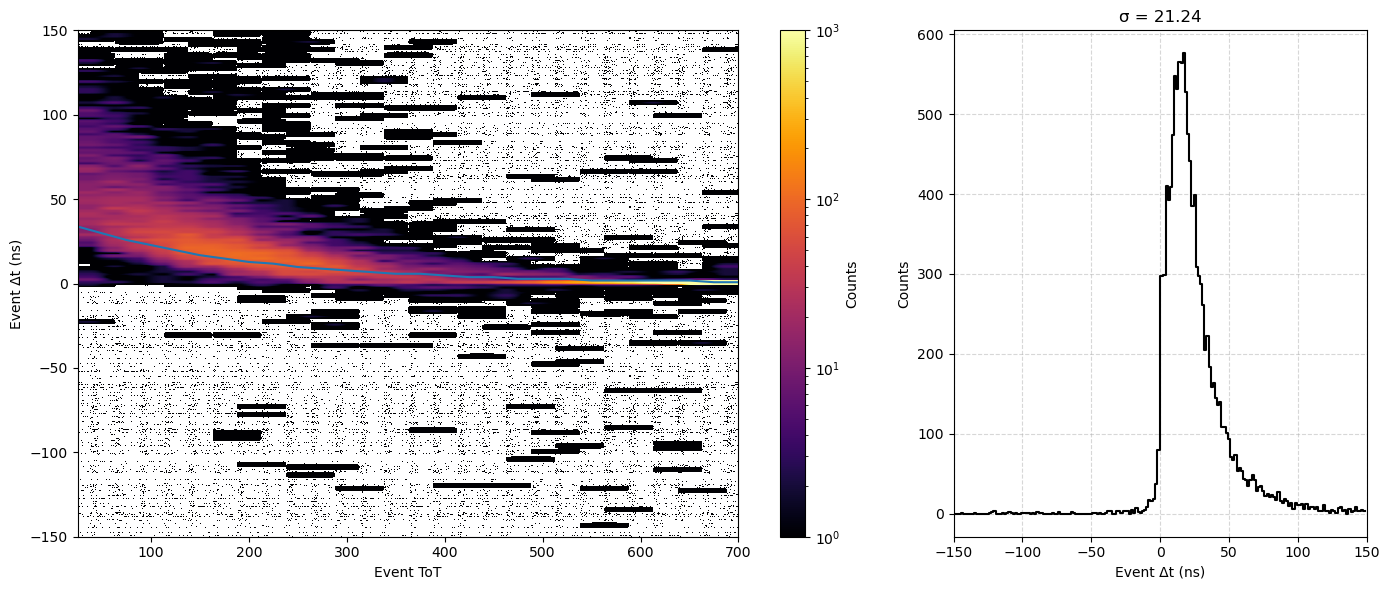

After TW correction...
Fitting for best timewalk params...


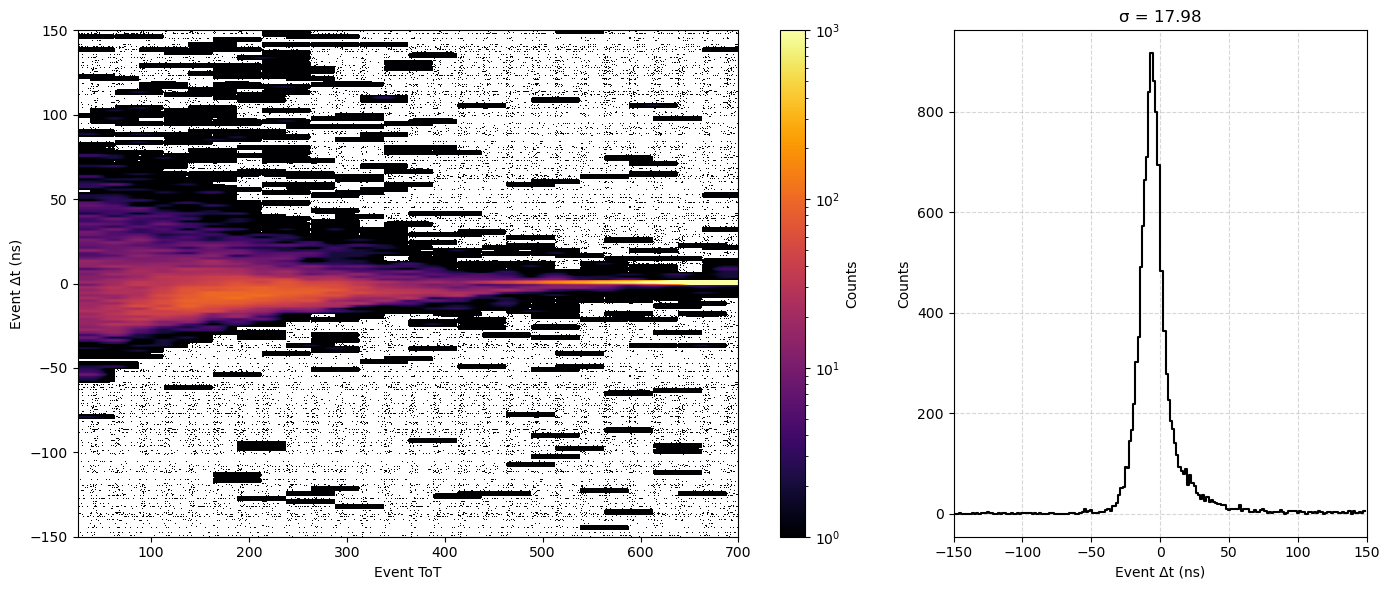

In [3]:
b_fit, c_fit = twalk.timewalk_main(input_files, dt_range_hi = 45)

## Using timewalk corrections on SPDC data

In [4]:
def extract_scan_info(filename): 
    with h5py.File(filename, 'r') as h5f:
        scan_info_data = h5f['scan_info'][()]
        scan_info_str = scan_info_data.decode('utf-8')
        scan_info = json.loads(scan_info_str)

        return scan_info

In [5]:
def concat_sid_results_list(data_type = 'selections', directory = None, selections = None, sid_start = None, sid_end = None): 
    if (sid_start is not None) and (sid_end is not None): 
        selections = np.arange(sid_start, sid_end + 1, 1)
    
    dfs = []
    
    for sid in selections:
        if directory == None:
            filename = f"{data_type}_{sid}.h5"
        else: 
            filename = f"{directory}/"f"{data_type}_{sid}.h5"
        if os.path.exists(filename):
            df = pd.read_hdf(filename)
            scan_info = extract_scan_info(filename)
            df['del_theta_found'] = scan_info['del_theta']
            dfs.append(df)
        else:
            print(f"Warning! {filename} not found... continuing to next file") 

    if dfs: 
        print(f"Total amount files used: {len(dfs)}")
        dfs_final = pd.concat(dfs, ignore_index=True)
        return dfs_final
    else:
        print("No files were found!")
        return pd.DataFrame()  

    return dfs_final
    

In [6]:
pair_directory = '/nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs'

df = concat_sid_results_list(data_type = 'pairs', directory = pair_directory, sid_start = 164274, sid_end = 164347)

df_qgi_pairs = df.copy()
del df

Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164278.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164279.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164280.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164281.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164282.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164283.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164284.h5 not found... continuing to next file
Warning! /nsls2/data/chx/proposals/2025-1/pass-316251/Results/data/pairs/pairs_164285.h5 not found... continuing to ne

In [7]:
df_qgi_pairs

,t_1,xc_1,yc_1,ToT_max_1,ToT_sum_1,n_1,x_1,y_1,t_ns_1,index_1,...,xc_1_p,yc_1_p,xc_2_p,yc_2_p,del_theta_found,thresholds_1,thresholds_2,pair_id,index_1_t,index_2_t
0,49638459,459.0,381.000000,300,300,1,459,381,7.756009e+07,14971,...,390.271667,339.018188,107.845779,145.222961,0.039859,NaN,NaN,NaN,NaN,NaN
1,62924341,331.0,94.000000,400,400,1,331,94,9.831928e+07,19817,...,318.616364,120.913788,71.503082,94.208633,0.039859,NaN,NaN,NaN,NaN,NaN
2,147969235,258.0,377.000000,400,400,1,258,377,2.312019e+08,50936,...,260.691498,538.490112,-41.966858,41.150055,0.039859,NaN,NaN,NaN,NaN,NaN
3,179738307,513.0,378.299988,175,250,2,513,378,2.808411e+08,62616,...,451.729614,349.381317,218.679367,106.194199,0.039859,NaN,NaN,NaN,NaN,NaN
4,206688543,283.0,0.000000,200,200,1,283,0,3.229508e+08,72645,...,287.128784,-39.300140,215.650284,90.989822,0.039859,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28110077,1153707873054,390.0,8.000000,275,275,1,390,8,1.802669e+12,2235107,...,353.362915,74.588531,231.753799,410.119049,0.039663,281.0,452.0,"(2235107, 2235105, 1802668551646.875, 18026685...","(2235107, 1802668551646.875)","(2235105, 1802668551029.6875)"
28110078,1153717146102,155.0,15.000000,375,375,1,155,15,1.802683e+12,2251566,...,172.449493,58.089569,186.420197,411.530884,0.039663,435.0,407.0,"(2251566, 2251563, 1802683040784.375, 18026830...","(2251566, 1802683040784.375)","(2251563, 1802683040478.125)"
28110079,1153718119999,269.0,58.000000,275,275,1,269,58,1.802685e+12,2253270,...,266.633057,87.438705,91.964249,406.959229,0.039663,366.0,413.0,"(2253270, 2253271, 1802684562498.4375, 1802684...","(2253270, 1802684562498.4375)","(2253271, 1802684563171.875)"
28110080,1153726713970,248.0,0.000000,175,175,1,248,0,1.802698e+12,2268320,...,247.789291,-10.829559,419.739838,294.516449,0.039663,380.0,405.0,"(2268320, 2268322, 1802697990578.125, 18026979...","(2268320, 1802697990578.125)","(2268322, 1802697990787.5)"


In [8]:
df_qgi_pairs_dp = df_qgi_pairs[df_qgi_pairs['dp'] < 4]
df_qgi_pairs_dp_Etot = df_qgi_pairs_dp[(df_qgi_pairs_dp['E_tot'] <= 15.4) & (df_qgi_pairs_dp['E_tot'] >= 14.6)]
df_qgi_pairs_dp_Etot = df_qgi_pairs_dp_Etot[(df_qgi_pairs_dp_Etot['delta_t'] <= 55) & (df_qgi_pairs_dp_Etot['delta_t'] >= -55)]
dt_fin = df_qgi_pairs_dp_Etot['delta_t']
dt_min, dt_max = np.min(dt_fin), np.max(dt_fin)

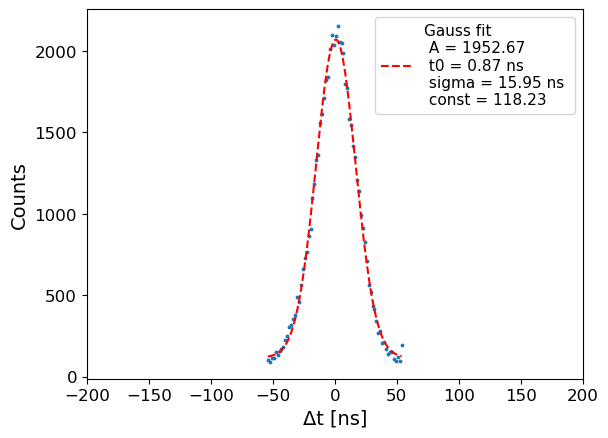

In [9]:
from scipy.optimize import curve_fit

N_bins = 1

counts, bins = np.histogram(dt_fin, bins = np.arange(dt_min, dt_max + 1.5625*N_bins, 1.5625*N_bins))
bin_centers = (bins[1:] + bins[:-1])/2

popt, pcov = curve_fit(ts.gauss, bin_centers, counts, p0 = [1000, 0, 25, 1])

x_smooth = np.arange(bin_centers.min(), bin_centers.max() + 0.01, 0.01)
fit_curve = ts.gauss(x_smooth, *popt)

plt.figure()
plt.plot(bin_centers, counts, '.', markersize = 3.5)
plt.plot(x_smooth, fit_curve, '--', color = 'red', label = f"Gauss fit \n A = {popt[0] :.2f} \n t0 = {popt[1] :.2f} ns \n sigma = {popt[2] :.2f} ns \n const = {popt[3] :.2f}")
plt.xlabel("Δt [ns]", fontsize = 14)
plt.ylabel("Counts", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(-200,200)
plt.legend(fontsize = 11)
plt.show()

In [10]:
def timewalk_corr_exp(ToT, b = 38.2, c = -0.0054): 
    return (b*np.exp(c*ToT)).astype(np.uint64)

In [11]:
def timewalk_corr_exp_ns(ToT, b = 38, c = -0.0093):
    return (b*np.exp(c*ToT)).astype(np.uint64) * 1.5625

In [12]:
df_pairs = df_qgi_pairs_dp_Etot.copy()

In [13]:
df_pairs['t_ns_1'] -= timewalk_corr_exp_ns(df_pairs['ToT_sum_1'], b = b_fit, c = c_fit)
df_pairs['t_ns_2'] -= timewalk_corr_exp_ns(df_pairs['ToT_sum_2'], b = b_fit, c = c_fit)

dt_corr = df_pairs['t_ns_1'].to_numpy(dtype = np.float64) - df_pairs['t_ns_2'].to_numpy(dtype = np.float64)

In [14]:
#dt_corr = df_qgi_pairs_dp_Etot['delta_t_corrected']
dt_corr_min, dt_corr_max = np.min(dt_corr), np.max(dt_corr)


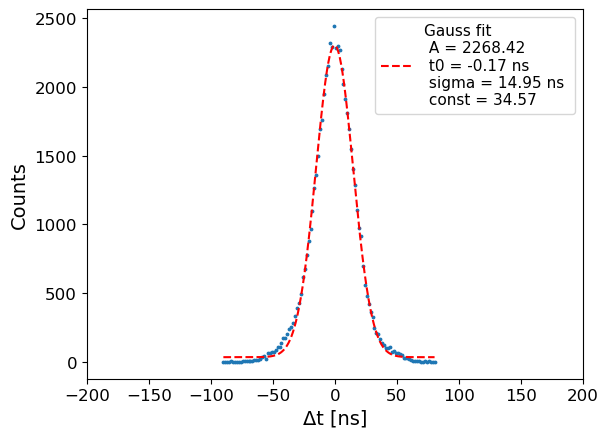

In [15]:
N_bins = 1

counts, bins = np.histogram(dt_corr, bins = np.arange(dt_corr_min, dt_corr_max + 1.5625*N_bins, 1.5625*N_bins))
bin_centers = (bins[1:] + bins[:-1])/2

popt, pcov = curve_fit(ts.gauss, bin_centers, counts, p0 = [1000, 0, 25, 1])

x_smooth = np.arange(bin_centers.min(), bin_centers.max() + 0.01, 0.01)
fit_curve = ts.gauss(x_smooth, *popt)

plt.figure()
plt.plot(bin_centers, counts, '.', markersize = 3.5)
plt.plot(x_smooth, fit_curve, '--', color = 'red', label = f"Gauss fit \n A = {popt[0] :.2f} \n t0 = {popt[1] :.2f} ns \n sigma = {popt[2] :.2f} ns \n const = {popt[3] :.2f}")
plt.xlabel("Δt [ns]", fontsize = 14)
plt.ylabel("Counts", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(-200,200)
plt.legend(fontsize = 11)
plt.show()